**1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

**2. Loading California Housing Dataset to Pandas DataFrame**

In [2]:
housing_data = fetch_california_housing()

In [3]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])

In [4]:
df = Features.join(Target)

In [5]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**3. Preprocessing: Removing Outliers and Scaling**

In [6]:
df[['MedInc', 'Target']].describe()[1:] #.style.highlight_max(axis=0)

,MedInc,Target
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


It seems that Target has some outliers (as well as MedInc), because 75% of the data has price less than 2.65, but maximum price go as high as we are going to remove extremely expensive houses as they will add unnecessary noize to the data.

In [7]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]

**4. Removed Outliers**

In [8]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


In [9]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

In [10]:
X.max(), y.max() # features are scaled now

(1.0, 1.0)

**5. Correlation Between Price and Income**

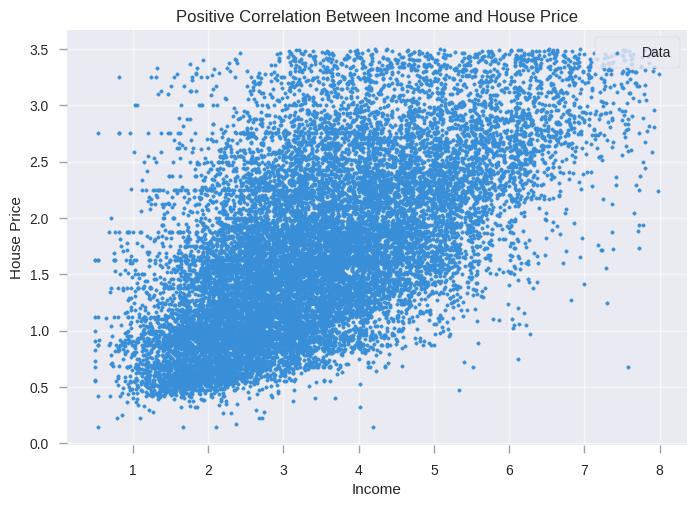

In [34]:
#plt.figure(figsize=(16,6))
#plt.rcParams['figure.dpi'] = 227
plt.style.use("seaborn-v0_8")
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price')
plt.xlabel('Income')
plt.ylabel('House Price')
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

**6. Batch Gradient Descent**

In [25]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    '''
    Gradient Descent for a single feature
    '''
    
    m, b = 0.2, 0.2 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse

In [35]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    #plt.figure(figsize=(10,4))
    #plt.rcParams['figure.dpi'] = 100
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title)
    plt.xlabel('Income')
    plt.ylabel('Price')
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

**7. Predicting House Price With Batch Gradient Descent**

MSE: 0.3493097403876614


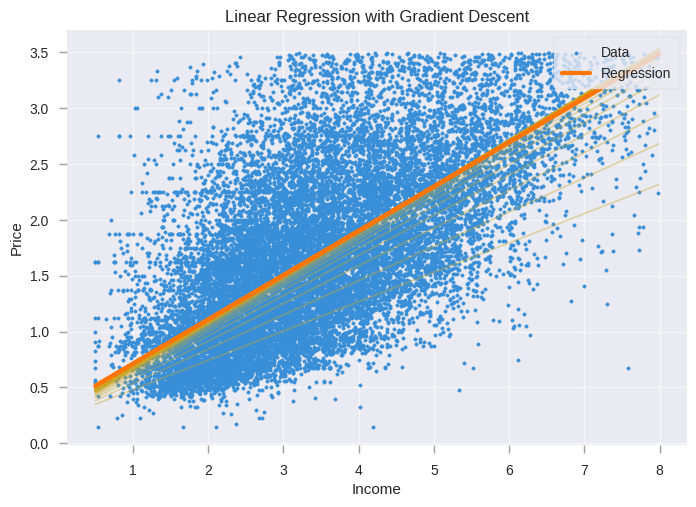

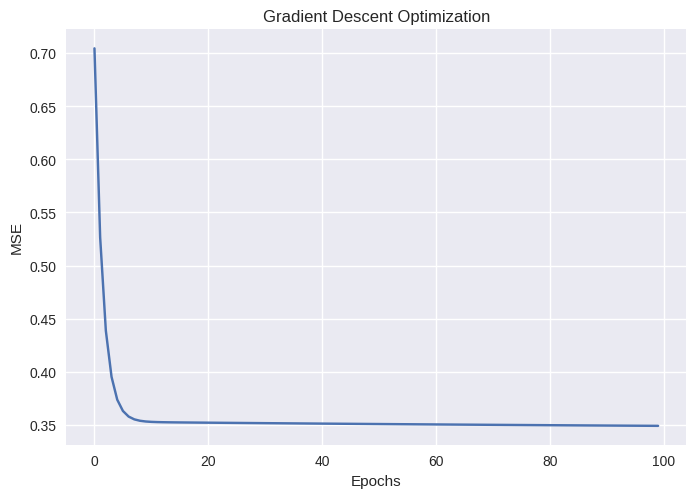

In [36]:
X = df.MedInc
y = df.Target

m, b, log, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with Gradient Descent")

#plt.figure(figsize=(10,4))
#plt.rcParams['figure.dpi'] = 100
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

**8. Stochastic Gradient Descent**

In [37]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [38]:
m, b, log, mse = SGD(X, y, lr=0.01, epoch=100, batch_size=2)

**9. Predicting House Price With Stochastic Gradient Descent**

MSE: 0.347969447030389


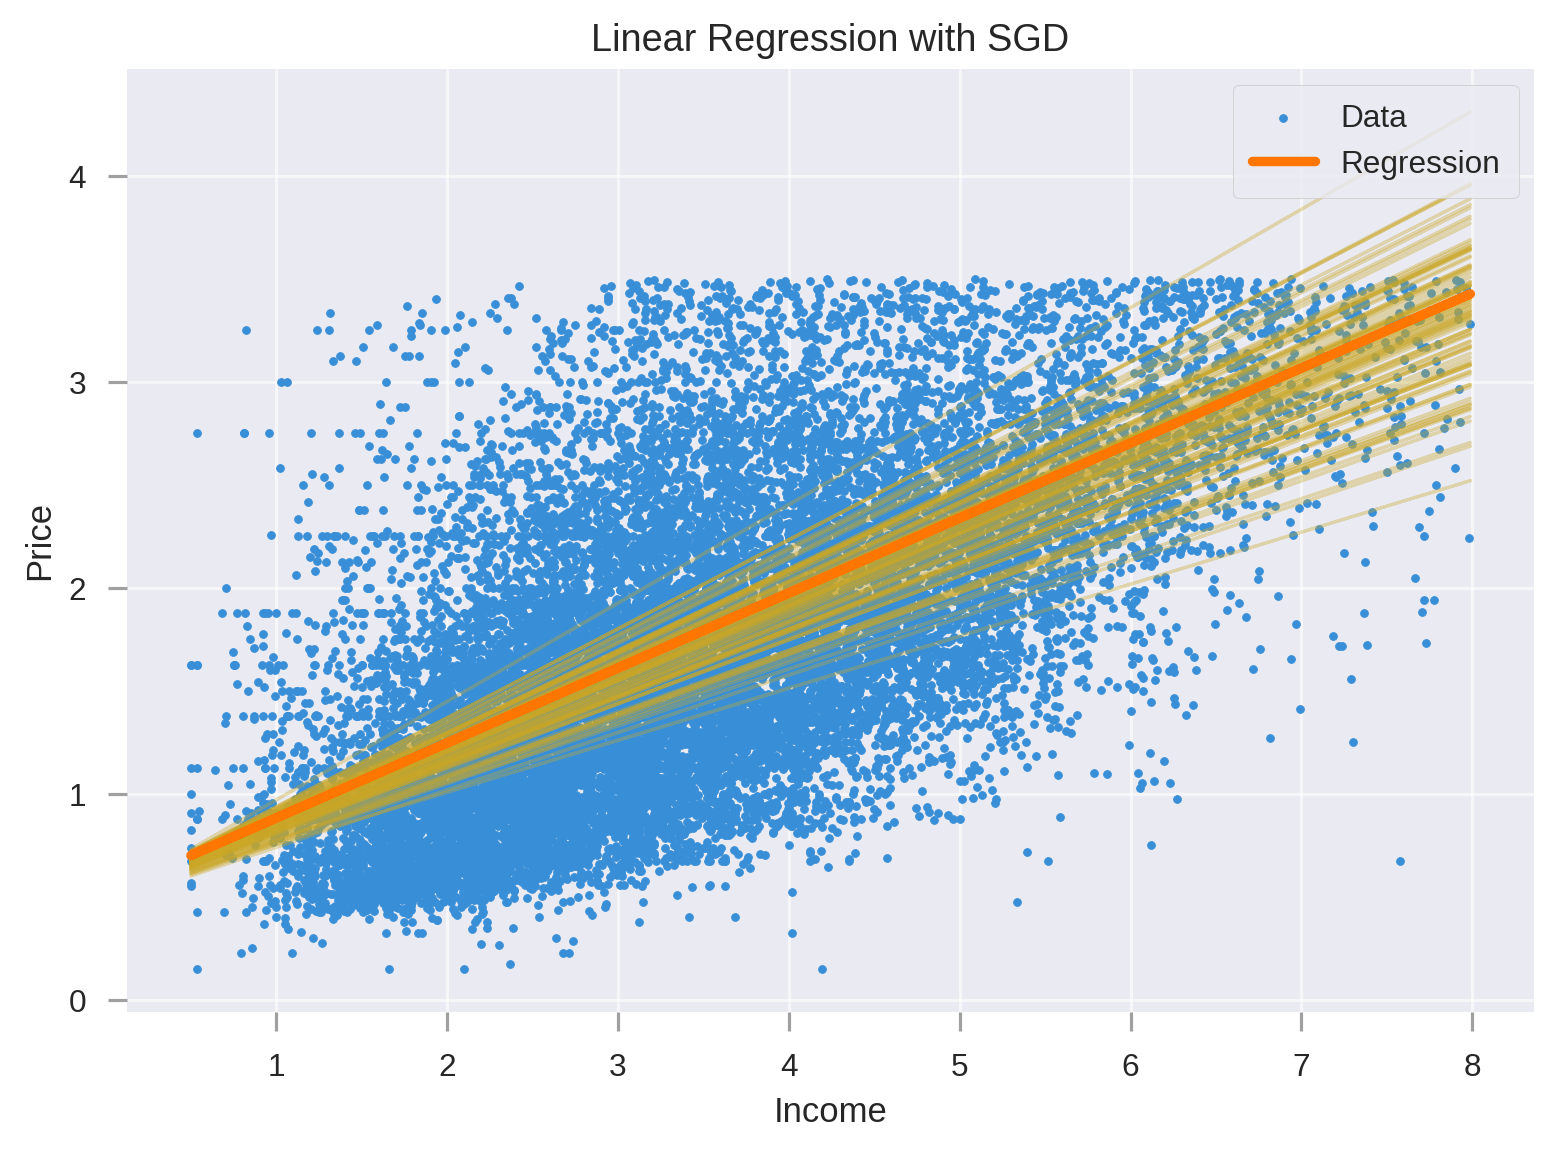

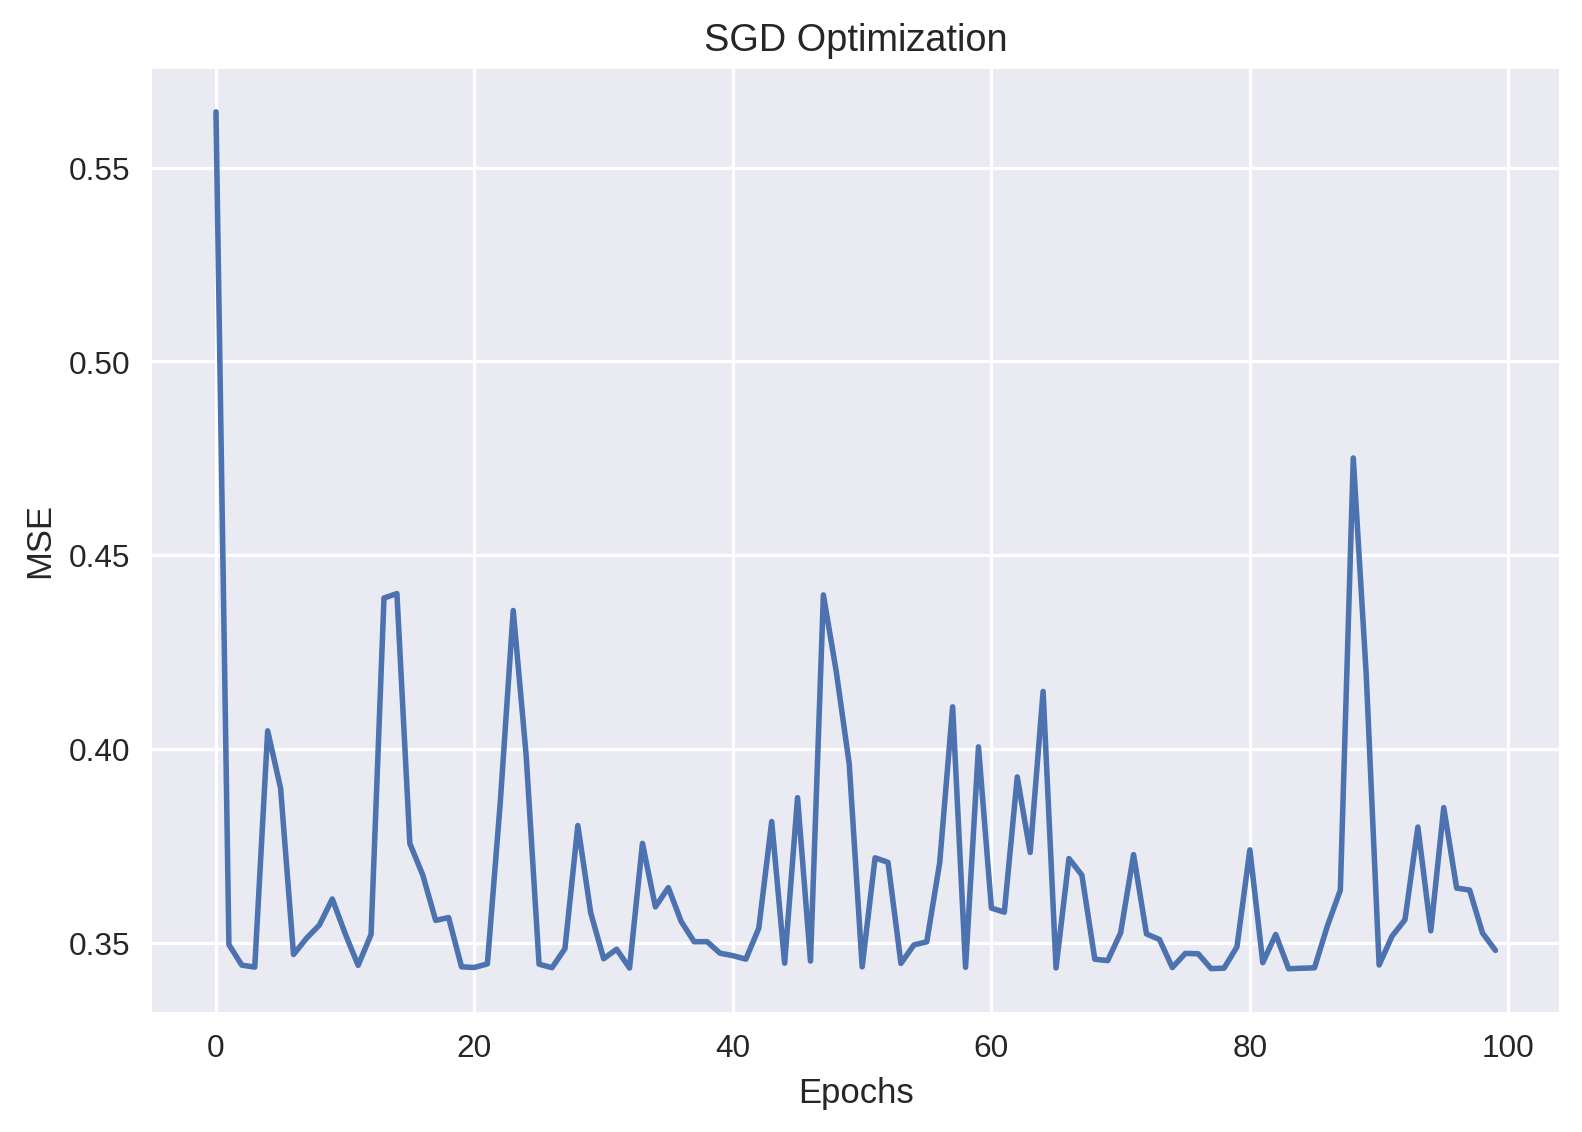

In [44]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with SGD")

#plt.figure(figsize=(16,3))
#plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()